In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import mylibrary.splinelib_nd as tsn

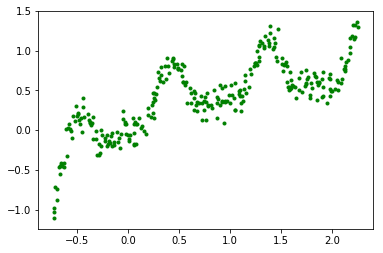

In [2]:
x = np.linspace(0,2,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = (x - 0.5)*1.5 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [14]:
piece = tsn.SplineND(1)
piece.make_root_global_coverage2(xx)

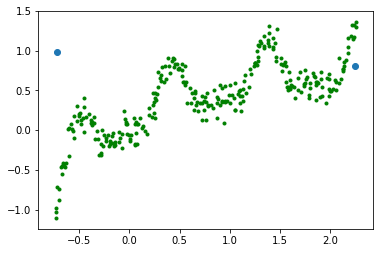

In [15]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(piece.X, piece.Y)

In [18]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):

    Y = piece.forward(xx)
    
    dy = Y-yy
    dx = piece.backward(dy)
    piece.update(0.3)
    
    if step % 100 == 0:
        piece.make_root_global_coverage2()
#         piece.add_new_point()

        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, dy, marker='.', color='m')
        
        plt.scatter(x, Y.reshape(-1), marker='.', color='r')        
        plt.plot(piece.X, piece.Y, marker='.', color='r', lw=2)
        
        plt.scatter(x, dx, marker='.', color='c')
        
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
Steps 0
Error 0.08234887316264329


_______________________
Steps 10
Error 0.07809809502295809


_______________________
Steps 20
Error 0.0759874557959313


_______________________
Steps 30
Error 0.07509747979260359


_______________________
Steps 40
Error 0.0747448731016717


_______________________
Steps 50
Error 0.07462604723134549


_______________________
Steps 60
Error 0.07461452806645169


_______________________
Steps 70
Error 0.07466081218846157


_______________________
Steps 80
Error 0.07472664694089405


_______________________
Steps 90
Error 0.07476879687993315


_______________________
Steps 100
Error 0.0748101582288602


_______________________
Steps 110
Error 0.07486320583938595


_______________________
Steps 120
Error 0.07491022001520588


_______________________
Steps 130
Error 0.07495041828538587


_______________________
Steps 140
Error 0.07497615686595116


_______________________
Steps 150
Error 0.07499309330679603


______________________

TclError: invalid command name "pyimage121"

In [17]:
# piece.add_new_point()
# spiece.X.shape

In [ ]:
# err, node = piece.root.get_maximum_error_node()
# print(err, node.indices)

In [ ]:
# piece.root.break_region()
# print(piece.root.splitNodes[0].indices)
# print(piece.del_Y.shape)

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
# plt.scatter(x, Y.reshape(-1), marker='.', color='m')
plt.plot(piece.X, piece.Y, marker='.', color='r')

In [ ]:
# piece.make_root_global_coverage(xx) ## this caused the function to change 
# plt.scatter(x, y, marker='.', color='g')
# plt.plot(piece.X, piece.Y, marker='.', color='r')

### For 3D data

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [3]:
num_points = 50
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
X1 = X1.reshape(-1)
X2 = X2.reshape(-1)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

XX = np.c_[X1, X2]
YY = Y.reshape(-1,1)

In [4]:
piece2D = tsn.SplineND(2)

In [5]:
piece2D.make_root_global_coverage2(XX)
# piece2D.Y = np.array([1,-1,-3])

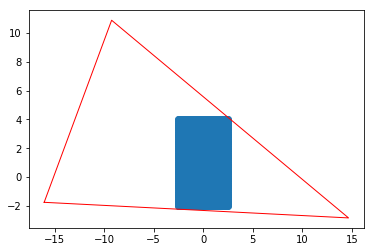

In [6]:
%matplotlib inline
plt.scatter(X1, X2)
px1 = np.append(piece2D.X[:,0], piece2D.X[:1,0])
px2 = np.append(piece2D.X[:,1], piece2D.X[:1,1])

plt.plot(px1, px2, lw=1, c='r')

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = piece2D.forward(XX)
    dy = yout - YY
    dx = piece2D.backward(dy)
    
    piece2D.update(0.3)
    
    if epoch%100 == 0 and epoch !=0:
        piece2D.make_root_global_coverage2()
        piece2D.add_new_point()

    if epoch%10 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
#         ax.scatter(piece2D.X[:,0], piece2D.X[:,1], piece2D.Y, lw=5, c='r')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  2.080147322416983
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
10 Error =  1.3605341495129666
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
20 Error =  1.190501448047776
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
30 Error =  1.093766032784965
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
40 Error =  1.018910182848023
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
50 Error =  0.9580664572563146
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
60 Error =  0.908212240940263
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
70 Error =  0.8672160664001815
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
80 Error =  0.8333829160363312
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
90 Error =  0.805350972971928
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
100 Error =  0.7820281238757096
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
110 Error =  0.7115395777401398
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
120 Error =  0.6569403894543894
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
130 Error =  0.6170590612246227
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
140 Error =  0.5872413390859494
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
150 Error =  0.564553149948

In [14]:
piece2D.add_new_point()

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()